In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline

In [3]:
iris = dts.load_iris()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
kneigh = KNeighborsClassifier().fit(X_train, y_train)
confusion_matrix(y_test, kneigh.predict(X_test))

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  3, 17]], dtype=int64)

In [47]:
logreg = LogisticRegression(solver="lbfgs", multi_class="auto")

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, iris.data, iris.target)

c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.98039216, 0.94117647, 1.        ])

In [50]:
bos = dts.load_boston()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(bos.data, bos.target)

In [58]:
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7459194018833171
0.6974446905378688


In [59]:
lr = Ridge().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7431519725412423
0.7011458896914127


In [63]:
lr = Lasso(alpha=1).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6902945607391484
0.6286435539774409


In [5]:
df = pd.read_csv("../titanic/train.csv")
df.loc[df.Age.isna(), "Age"] = df.Age.median()
df.loc[df.Embarked.isna(), "Embarked"] = "S"
df.loc[:,"Sex"] = df.loc[:,"Sex"].factorize()[0]
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df = pd.get_dummies(df)

In [655]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


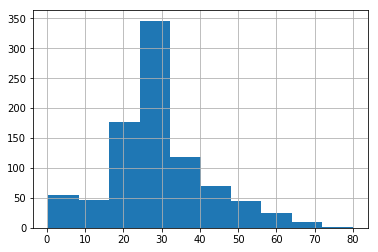

In [656]:
df.loc[:,"Age"].hist()

In [657]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


In [653]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.244019,0.110048,0.645933
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,0.000000,0.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


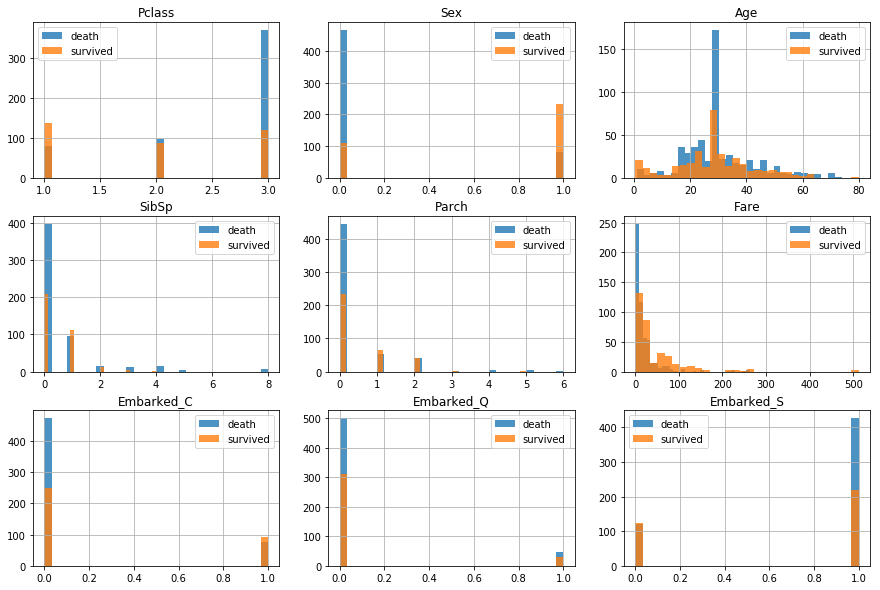

In [635]:
features = df.columns[df.columns != "Survived"]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.25)
ax = plt.subplot()
gp = df.groupby("Survived")

for i, f in enumerate(features):
    plt.subplot(3, 3, i + 1)
    df.loc[gp.groups[0],f].hist(bins=30, alpha=0.8, label="death")
    df.loc[gp.groups[1],f].hist(bins=30, alpha=0.8, label="survived")
    plt.title(f)
    plt.legend()

In [6]:
X = df.loc[:,df.columns != "Survived"].values
y = df.loc[:,df.columns == "Survived"].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
ests = [('pca', StandardScaler()), ('svm', SVC())]
prms = [{'svm__C': np.logspace(0, 2, 10).tolist()}]

p = Pipeline(ests)
p = GridSearchCV(p, prms, n_jobs=-1)
p.fit(X_train, y_train)
p.score(X_test, y_test)

c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8161434977578476

In [54]:
prms = [
    {
        "scaler": [StandardScaler()],
        "es": [SVC()],
        "es__C": [0.01, 0.1, 1, 10],
        "es__gamma": [0.01, 0.1, 1, 10]
    },
    {
        "scaler": [None],
        "es": [RandomForestClassifier()],
        "es__n_estimators": range(100, 1000, 100),
        "es__max_depth": range(5, 55, 10)
    },
]
est = Pipeline([('scaler', StandardScaler()), ('es', SVC())])
est = GridSearchCV(est, prms, n_jobs=-1).fit(X_train, y_train)
print(est.score(X_train, y_train))
print(est.score(X_test, y_test))

c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8547904191616766
0.8295964125560538


In [59]:
est = est.best_estimator_

In [62]:
est.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', None), ('es', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [71]:
df = pd.read_csv("../titanic/test.csv")
df.loc[df.Age.isna(), "Age"] = df.Age.median()
df.loc[df.Embarked.isna(), "Embarked"] = "S"
df.loc[df.Fare.isna(), "Fare"] = df.Fare.median()
df.loc[:,"Sex"] = df.loc[:,"Sex"].factorize()[0]
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df = pd.get_dummies(df)

In [72]:
res = est.predict(df.values)
df["Survived"] = res
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,0
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,1
5,3,0,14.0,0,0,9.2250,0,0,1,0
6,3,1,30.0,0,0,7.6292,0,1,0,1
7,2,0,26.0,1,1,29.0000,0,0,1,0
8,3,1,18.0,0,0,7.2292,1,0,0,1
9,3,0,21.0,2,0,24.1500,0,0,1,0


In [72]:
dt = dts.load_boston()

In [74]:
dt.data.shape

(506, 13)

In [22]:
tg = dt.target
dt = dt.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(dt.data, dt.target, random_state=4)
sc = StandardScaler().fit(X_train, y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

md = SVR(gamma=0.1, C=100).fit(X_train, y_train)
print(f"train: {md.score(X_train, y_train)}")
print(f"test: {md.score(X_test, y_test)}")

train: 0.9580522556752058
test: 0.8981664521750462


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(dt.data, dt.target, random_state=4)

md = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(f"train: {md.score(X_train, y_train)}")
print(f"test: {md.score(X_test, y_test)}")

train: 0.970825316079295
test: 0.8766242523803459


c:\users\rye_\.virtualenvs\pythonml-note-yo1hiwxi\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0 -1  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1 -1  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0 -1  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

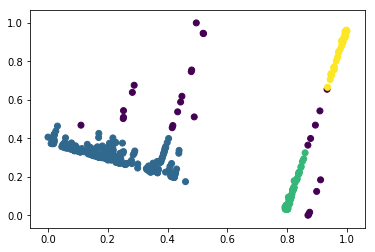

In [233]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import make_pipeline

val = PCA(2, random_state=0).fit_transform(dt.data)
val = MinMaxScaler().fit_transform(val)
trg = DBSCAN(eps=0.05).fit_predict(val)
plt.scatter(*val.T, c=trg)

print(trg)

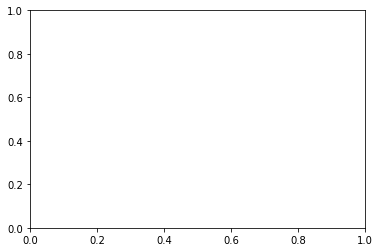

In [285]:
plt.axes()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5AB44A7F0>,
      dtype=object)

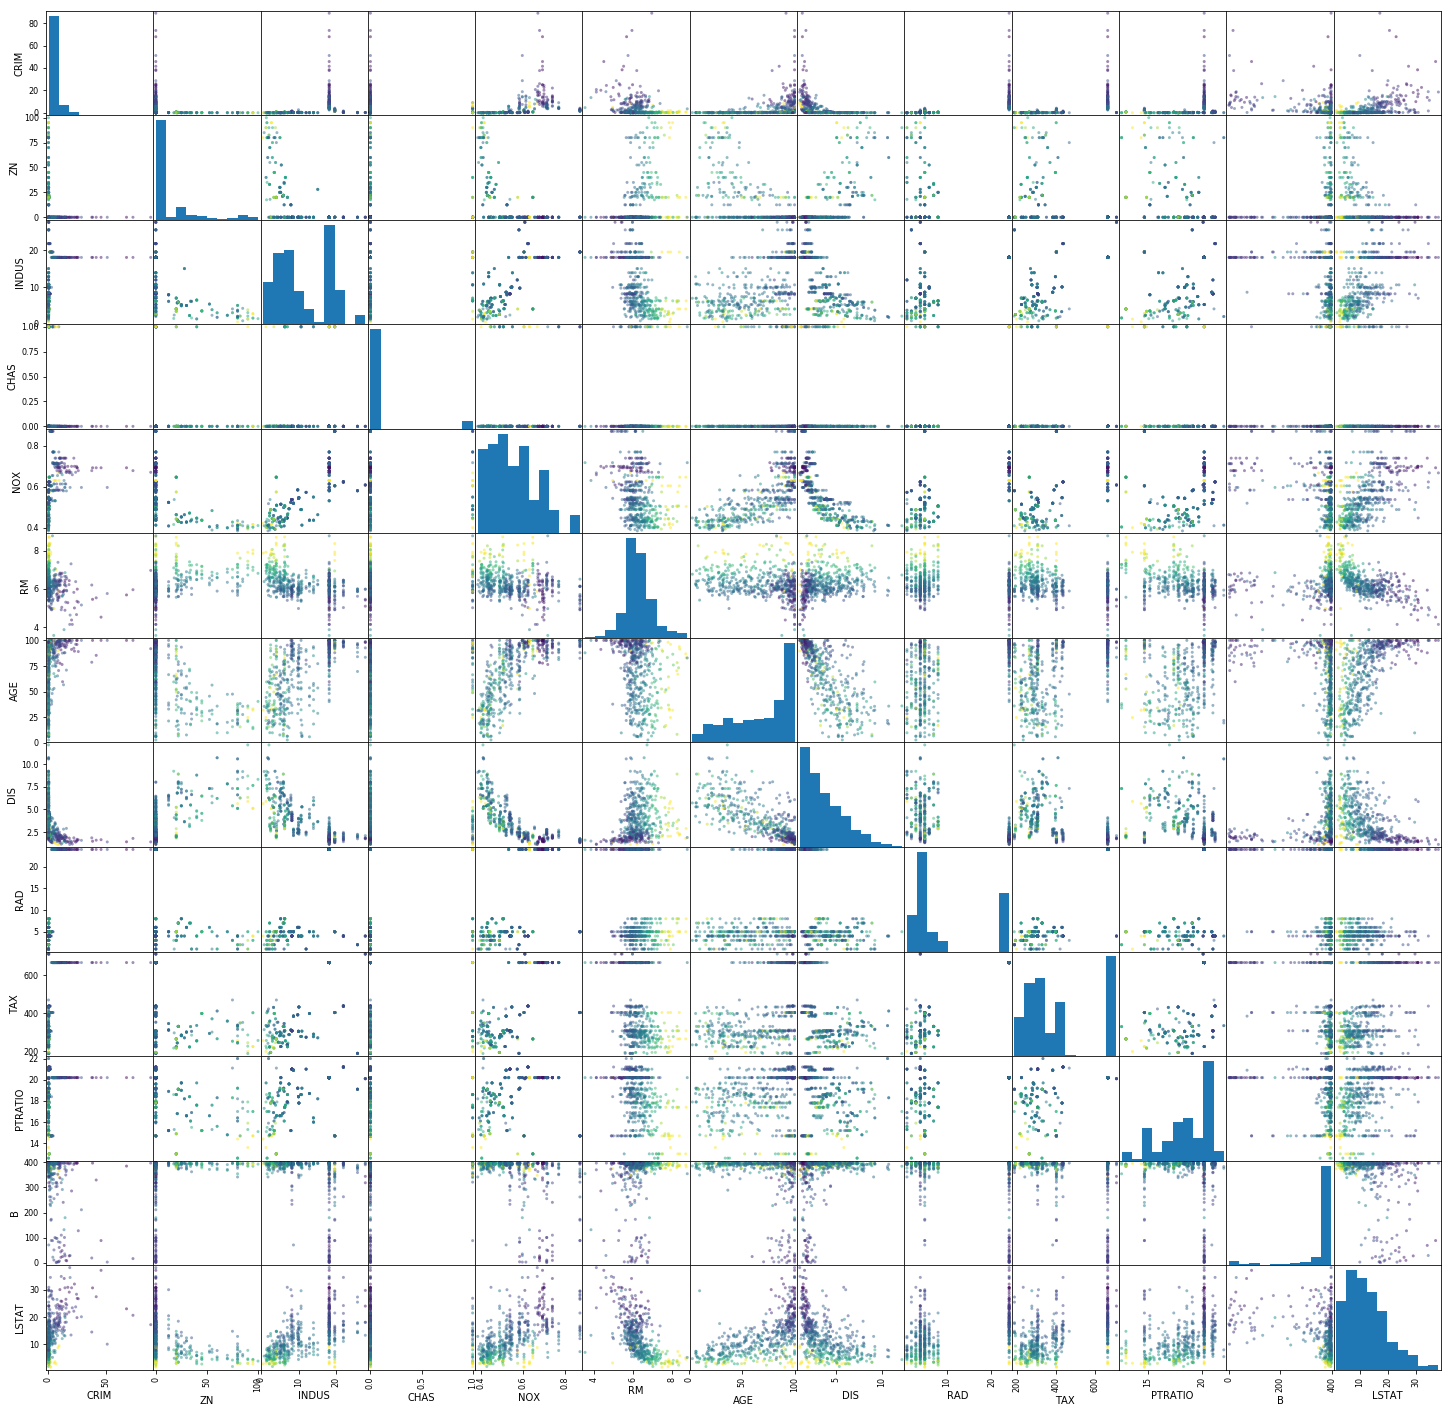

In [281]:
df = pd.DataFrame(dt.data, columns=dt.feature_names)
plt.figure(figsize=(25, 25), facecolor="white")
pd.plotting.scatter_matrix(df, c=dt.target, ax=plt.axes())